# **Tutorial 5: Xarray Data Analysis and Climatology**

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives**

Global climate can vary on long timescales, but it's also important to understand seasonal variations. For example, seasonal variations in precipitation associated with the migration of the [Intertropical Convergence Zone (ITCZ)](https://glossary.ametsoc.org/wiki/Intertropical_convergence_zone#:~:text=(Also%20called%20ITCZ%2C%20equatorial%20convergence,and%20Northern%20Hemispheres%2C%20respectively).) and monsoon systems occur in response to seasonal changes in temperature. In this tutorial, we will use data analysis tools in Xarray to explore the seasonal climatology of global temperature. Specifically, in this tutorial, we'll use the `groupby` operation in Xarray, which involves the following steps:

- **Split**: group data by value (e.g., month).
- **Apply**: compute some function (e.g., aggregate) within the individual groups.
- **Combine**: merge the results of these operations into an output dataset.

# **Setup**


In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd
import matplotlib.pyplot as plt

##  Figure Settings


###  Figure Settings


####  Figure Settings


#####  Figure Settings


######  Figure Settings


#######  Figure Settings


########  Figure Settings


#########  Figure Settings


##########  Figure Settings


###########  Figure Settings


############  Figure Settings


#############  Figure Settings


##############  Figure Settings


In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

##  Video 1: Video Title


###  Video 1: Video Title


####  Video 1: Video Title


#####  Video 1: Video Title


######  Video 1: Video Title


#######  Video 1: Video Title


########  Video 1: Video Title


#########  Video 1: Video Title


##########  Video 1: Video Title


###########  Video 1: Video Title


############  Video 1: Video Title


#############  Video 1: Video Title


##############  Video 1: Video Title


In [ ]:
# @title Video 1: Video Title
#Tech team will add code to format and display the video

# **Section 1: GroupBy: Split, Apply, Combine**

Simple aggregations (as we learned in the previous tutorial) can give useful summary of our dataset, but often we would prefer to aggregate conditionally on some coordinate labels or groups. Xarray provides the so-called `groupby` operation which enables the **split-apply-combine** workflow on Xarray DataArrays and Datasets. The split-apply-combine operation is illustrated in this figure from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html):

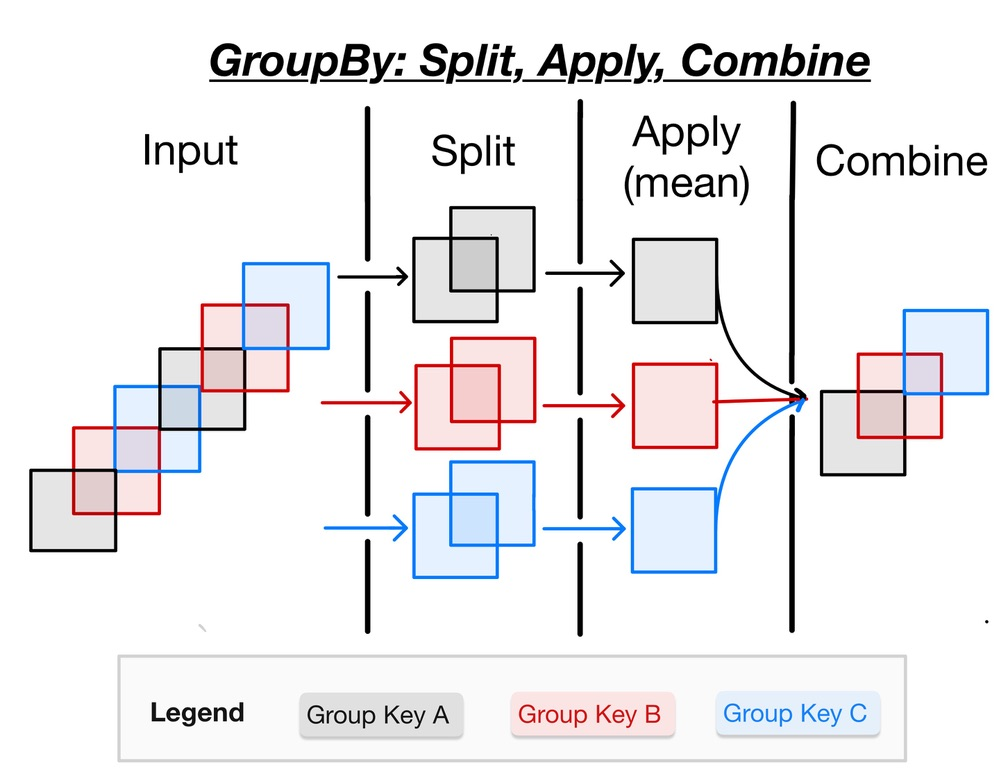



- The **split** step involves breaking up and grouping an xarray Dataset or DataArray depending on the value of the specified group key.
- The **apply** step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The **combine** step merges the results of these operations into an output xarray Dataset or DataArray.

We are going to use `groupby` to remove the seasonal cycle ("climatology") from our dataset, which will allow us to better observe long-term trends in the data. See the [xarray `groupby` user guide](https://xarray.pydata.org/en/stable/user-guide/groupby.html) for more examples of what `groupby` can take as an input.

Let's start by loading the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [ ]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath)
ds

Then, let's select a gridpoint closest to a specified lat-lon (in this case let's select 50ºN, 310ºE), and plot a time series of SST at that point (recall that we learned this is Tutorial 2). The annual cycle will be quite pronounced. Note that we are using the `nearest` method (see Tutorial 2 for a refresher) to find the points in our datasets closest to the lat-lon values we specify. What this returns may not match these inputs exactly.

In [ ]:
ds.tos.sel(lon=310, lat=50, method='nearest').plot(); #time range is 2000-01-15 to 2014-12-15

This plot is showing changes in monthly SST between 2000-01-15 to 2014-12-15. The annual cycle of SST change is apparent in this figure, but to understand the climatatology of this region, we need to calculate the average SST for each month over this time period. The first step is to split the data into groups based on month.

## **Section 1.1: Split**

Let's group data by month, i.e. all Januaries in one group, all Februaries in one group, etc.


In [ ]:
ds.tos.groupby(ds.time.dt.month)

<div class="admonition alert alert-info">

In the above code, we are using the `.dt` [`DatetimeAccessor`](https://xarray.pydata.org/en/stable/generated/xarray.core.accessor_dt.DatetimeAccessor.html) to extract specific components of dates/times in our time coordinate dimension. For example, we can extract the year with `ds.time.dt.year`. See also the equivalent [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html).
    
   </div>

Xarray also offers a more concise syntax when the variable you’re grouping on is already present in the dataset. This is identical to `ds.tos.groupby(ds.time.dt.month)`:

In [ ]:
ds.tos.groupby('time.month')

## **Section 1.2: Apply & Combine**

Now that we have groups defined, it’s time to “apply” a calculation to the group. These calculations can either be:

- aggregation: reduces the size of the group
- transformation: preserves the group’s full size

At then end of the apply step, xarray will automatically combine the aggregated/transformed groups back into a single object. 



### **Section 1.2.1: Compute the Climatology** 


Let's calculate the climatology at every point in the dataset. To do so, we will use aggregation and will calculate the mean SST for each month:


In [ ]:
tos_clim = ds.tos.groupby('time.month').mean()
tos_clim

For every spatial coordinate, we now have a monthly mean SST for the time period 2000-01-15 to 2014-12-15.

We can now plot the climatology at a specific point:

In [ ]:
tos_clim.sel(lon=310, lat=50, method='nearest').plot();

Based on this plot, the climatology of this location is defined by cooler SST from December to April and warmer SST from June to October, with an annual SST range of ~8ºC. 

#### **Questions 1.2.1: Climate Connection**

1. Considering the latitude and longitude of this data, can you explain why we observe this climatology?
2. How do you think seasonal variations in SST would differ at the equator? What about at the poles? What about at 50ºS?

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial5_Solution_c7a854ea.py)



### **Section 1.2.2: Spatial Variations**

We can now add a spatial dimension to this plot and look at the zonal mean climatology (the monthly mean SST at different latitudes):

In [ ]:
tos_clim.mean(dim='lon').transpose().plot.contourf(levels=12, cmap='turbo');

This gives us helpful information about the mean SST for each month, but it's difficult to asses the range of monthly temperatures throughout the year using this plot.

To better represent the range of SST, we can calculate and plot the difference between January and July climatologies:

In [ ]:
(tos_clim.sel(month=1) - tos_clim.sel(month=7)).plot(size=6, robust=True);

#### **Questions 1.2.1: Climate Connection**

1. What patterns do you observe in this map?
2. Why is there such an apparent difference between the Northern and Southern Hemisphere SST changes?
3. How does the migration of the ITCZ relate to seasonal changes in Northern vs. Southern Hemisphere temperatures?

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial5_Solution_3a74bea8.py)



# **Summary**

In this tutorial, we focused on exploring seasonal climatology in global temperature data using the split-apply-combine approach in Xarray. By utilizing the split-apply-combine approach, we gained insights into the seasonal climatology of temperature and precipitation data, enabling us to analyze and understand the seasonal variations associated with global climate patterns.




# **Resources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).